In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as nm

import warnings as wr
wr.filterwarnings('ignore')


In [2]:
dff = pd.read_csv('car driving risk analysis.csv')

In [3]:
dff

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72
5,115,10
6,50,7
7,230,85
8,190,45
9,260,91


In [4]:
dff.head()

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72


In [5]:
dff.shape

(15, 2)

Text(0.5, 1.0, 'Motorcycle Riding')

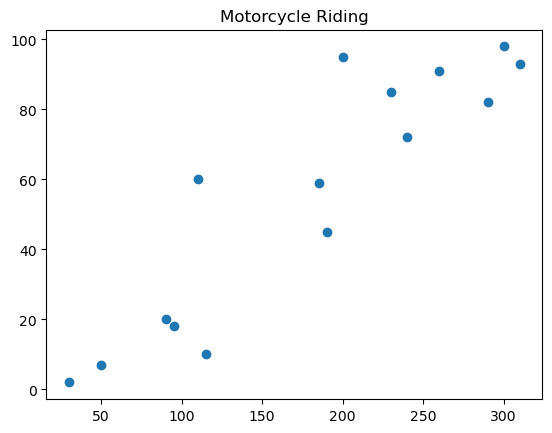

In [6]:
plt.scatter(dff.speed, dff.risk)
plt.title('Motorcycle Riding')

Text(0, 0.5, 'Risk in percentange')

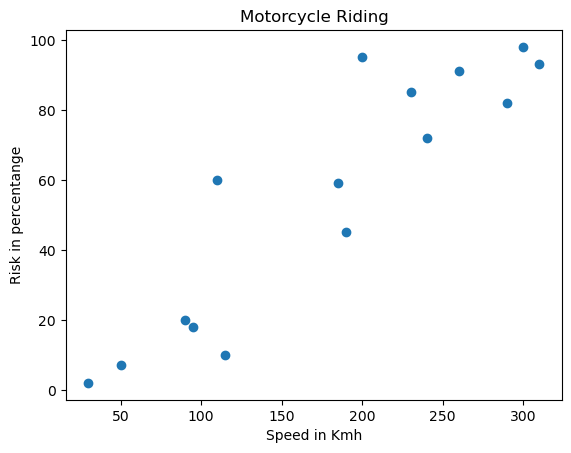

In [8]:
plt.scatter(dff.speed, dff.risk)
plt.title('Motorcycle Riding')
plt.xlabel('Speed in Kmh')
plt.ylabel('Risk in percentange')

In [87]:
x=dff.drop('risk',axis=1)
y=dff[['risk']]

In [88]:
x.head()

,speed
0,200
1,90
2,300
3,110
4,240


In [89]:
y.head()

,risk
0,95
1,20
2,98
3,60
4,72


In [90]:
from sklearn.model_selection import train_test_split

In [91]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.4,random_state=1)

In [92]:
xtest.head()

,speed
3,110
7,230
6,50
2,300
10,290


In [93]:
xtrain.head()

,speed
1,90
13,95
0,200
14,30
9,260


In [95]:
ytrain.head()

,risk
1,20
13,18
0,95
14,2
9,91


# Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lr = LinearRegression()

In [98]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [99]:
xtest

,speed
3,110
7,230
6,50
2,300
10,290
4,240


In [100]:
lr.predict(xtest)

array([[ 27.15301215],
       [ 73.82259334],
       [  3.81822156],
       [101.04651569],
       [ 97.15738393],
       [ 77.7117251 ]])

In [102]:
ytest

,risk
3,60
7,85
6,7
2,98
10,82
4,72


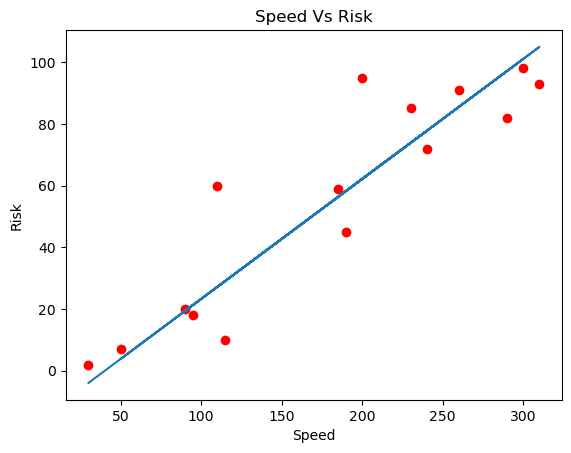

In [103]:

plt.scatter(dff.speed,dff.risk, color='red')
plt.title('Speed Vs Risk')
plt.xlabel('Speed')
plt.ylabel('Risk')
plt.plot(dff.speed, lr.predict(dff[['speed']]))

In [104]:
lr.predict([['60']])

array([[7.70735333]])

In [105]:
lr.intercept_

array([-15.62743727])

In [106]:
lr.coef_

array([[0.38891318]])

In [109]:
y = 0.38891318 *60 + -15.62743727

In [110]:
y

7.707353530000001

In [111]:
lr.predict([['210']])

array([[66.04432981]])

In [121]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [128]:
model = LogisticRegression()

In [130]:
model.fit(xtrain, ytrain)

LogisticRegression()

In [131]:
model.predict(xtest)

array([10, 91,  2, 93, 93, 91], dtype=int64)

In [132]:
model.score(xtest, ytest)

0.0

In [133]:
pred_log = model.predict(xtest)

In [134]:
pred_log

array([10, 91,  2, 93, 93, 91], dtype=int64)

In [135]:
accuracy_score(ytest, model.predict(xtest))

0.0

In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest , pred_log)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)